In [1]:
import numpy as np 
import matplotlib.pyplot as plt  


# Training Data
X = np.linspace(-5, 5, 100).reshape((100,1))
y = np.cos(X)

# X = [1, 3, 6, 8]       # Input locations
# y = [2.5, 1.0, 4.0, 3.5]  # Corresponding noisy observations

X_test = [.25, 3.35, 4.25] # Points we want to fit
# X_test = [2]

tmp = np.column_stack((X, y))
print(tmp.shape)

(100, 2)


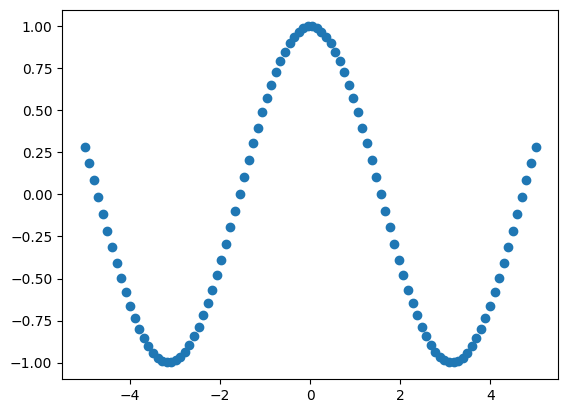

In [2]:
# Actual
plt.scatter(tmp[:,0], tmp[:,1])
plt.show()

In [3]:
class GP_Regression:
    def __init__(self, x_data, y_data, length, variance):
        self.length = length 
        self.variance = variance 
        self.x_data = x_data 
        self.y_data = y_data
        self.covariance_matrix = self.RBF(self.x_data, self.length, self.variance)
        
    
    def RBF(self, x_data, length, variance):
        """ This is the radial basis function, which we can use as our covariance function. There are others that can be used as well, but the idea is that 
            we're quantifying a relationship between each point and the other points. Note that this is not including the output of the function we're trying to predict. 
            So we're quantifying the relationship between the x's and not accounting for the f(x)'s when doing this
            """
        return (variance ** 2) * np.exp(-1/(2 * (length)**2) * np.array([[(x_i - x_j)**2 for x_i in x_data] for x_j in x_data])) 
    

    def calculate_predictions(self, x_test):
        """ First we calculate the test points covariance with respect to the training points. 
            Then we obtain the coefficients (weights) used to determine our mean (the best prediction we can get) by multiplying the inverse of the covariance matrix (RBF) of the training points by the f(x) data. 
            We take the weights and multiply them by the covariance matrix of our predicted points in relation to the training points --> This gives us our mean.
            
            Lastly, we want to obtain the covariance matrix of our test points.
            For each test point covariance with respect to the training points, we multiply it by the inverse of our covariance matrix and multiply the result by the covariance of the training points with respect to the test points 
            ** Note that the covariance of the training points with respect to the test points are usually a symmetric matrix, meaning that the covariance of the test points with respect to the training points are usually the transpose 
            of the former. There are instances where this is not the case, which is why we use both instances of information on the inverse of our kernel.

            Finally, we subtract the previous calculation from the covariance of the test points with each other. This is because we want to remove the variance influences of the training covariance from the testing covariance.
            """
        kernel_wrt_x_test = (self.variance ** 2) * np.exp(-1/(2 * (self.length)**2) * np.array([[(x_test_val-x_data_val)**2 for x_data_val in self.x_data] for x_test_val in x_test]))
        predictive_mean = kernel_wrt_x_test @ np.linalg.inv(self.covariance_matrix) @ self.y_data 
        predictive_covariance = self.RBF(x_test, self.length, self.variance) - (kernel_wrt_x_test @ np.linalg.inv(self.covariance_matrix) @ kernel_wrt_x_test.T)
        return predictive_mean, predictive_covariance.diagonal()
    

In [16]:
model = GP_Regression(tmp[:,0], tmp[:, 1], .1, 5)
pred_mean, pred_var = model.calculate_predictions(X_test)

In [17]:
pred_mean, pred_var

(array([ 0.96891242, -0.97835922, -0.44634522]),
 array([0.00088598, 0.10859474, 0.13618128]))

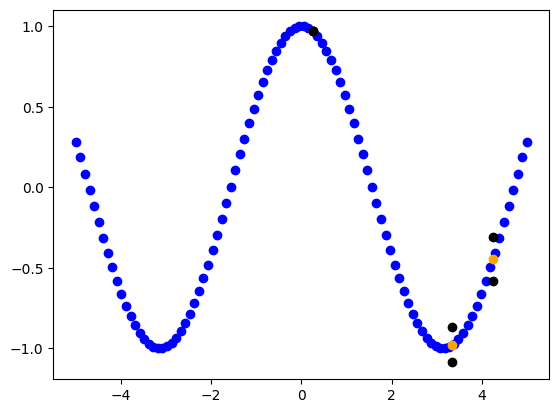

In [18]:
# Actual
plt.scatter(tmp[:,0], tmp[:,1], c='blue')
plt.scatter(X_test, pred_mean, c='orange')
plt.scatter(X_test, pred_mean + pred_var, c='black')
plt.scatter(X_test, pred_mean - pred_var, c='black')
plt.show()